In [10]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
data = pd.read_csv("transformed_data.csv")
data2 = pd.read_csv("raw_data.csv")
print(data)

      CODE      COUNTRY        DATE    HDI        TC        TD       STI  \
0      AFG  Afghanistan  2019-12-31  0.498  0.000000  0.000000  0.000000   
1      AFG  Afghanistan  2020-01-01  0.498  0.000000  0.000000  0.000000   
2      AFG  Afghanistan  2020-01-02  0.498  0.000000  0.000000  0.000000   
3      AFG  Afghanistan  2020-01-03  0.498  0.000000  0.000000  0.000000   
4      AFG  Afghanistan  2020-01-04  0.498  0.000000  0.000000  0.000000   
...    ...          ...         ...    ...       ...       ...       ...   
50413  ZWE     Zimbabwe  2020-10-15  0.535  8.994048  5.442418  4.341855   
50414  ZWE     Zimbabwe  2020-10-16  0.535  8.996528  5.442418  4.341855   
50415  ZWE     Zimbabwe  2020-10-17  0.535  8.999496  5.442418  4.341855   
50416  ZWE     Zimbabwe  2020-10-18  0.535  9.000853  5.442418  4.341855   
50417  ZWE     Zimbabwe  2020-10-19  0.535  9.005405  5.442418  4.341855   

             POP    GDPCAP  
0      17.477233  7.497754  
1      17.477233  7.497754  


In [11]:
print(data.head())

  CODE      COUNTRY        DATE    HDI   TC   TD  STI        POP    GDPCAP
0  AFG  Afghanistan  2019-12-31  0.498  0.0  0.0  0.0  17.477233  7.497754
1  AFG  Afghanistan  2020-01-01  0.498  0.0  0.0  0.0  17.477233  7.497754
2  AFG  Afghanistan  2020-01-02  0.498  0.0  0.0  0.0  17.477233  7.497754
3  AFG  Afghanistan  2020-01-03  0.498  0.0  0.0  0.0  17.477233  7.497754
4  AFG  Afghanistan  2020-01-04  0.498  0.0  0.0  0.0  17.477233  7.497754


In [12]:
print(data2.head())

  iso_code     location        date  total_cases  total_deaths  \
0      AFG  Afghanistan  2019-12-31          0.0           0.0   
1      AFG  Afghanistan  2020-01-01          0.0           0.0   
2      AFG  Afghanistan  2020-01-02          0.0           0.0   
3      AFG  Afghanistan  2020-01-03          0.0           0.0   
4      AFG  Afghanistan  2020-01-04          0.0           0.0   

   stringency_index  population  gdp_per_capita  human_development_index  \
0               0.0    38928341        1803.987                    0.498   
1               0.0    38928341        1803.987                    0.498   
2               0.0    38928341        1803.987                    0.498   
3               0.0    38928341        1803.987                    0.498   
4               0.0    38928341        1803.987                    0.498   

  Unnamed: 9 Unnamed: 10 Unnamed: 11  Unnamed: 12  Unnamed: 13  
0      #NUM!       #NUM!       #NUM!    17.477233  7.497754494  
1      #NUM!    

In [13]:
data["COUNTRY"].value_counts()

COUNTRY
Afghanistan        294
Indonesia          294
Macedonia          294
Luxembourg         294
Lithuania          294
                  ... 
Tajikistan         172
Comoros            171
Lesotho            158
Hong Kong           51
Solomon Islands      4
Name: count, Length: 210, dtype: int64

In [14]:
data["COUNTRY"].value_counts().mode()

0    294
Name: count, dtype: int64

In [15]:
code = data["CODE"].unique().tolist()
country = data["COUNTRY"].unique().tolist()
hdi = []
tc = []
td = []
sti = []
population = data["POP"].unique().tolist()
gdp = []
for i in country:
    hdi.append((data.loc[data["COUNTRY"] == i, "HDI"]).sum()/294)
    tc.append((data2.loc[data2["location"] == i, "total_cases"]).sum())
    td.append((data2.loc[data2["location"] == i, "total_deaths"]).sum())
    sti.append((data.loc[data["COUNTRY"] == i, "STI"]).sum()/294)
    population.append((data2.loc[data2["location"] == i, "population"]).sum()/294)

aggregated_data = pd.DataFrame(list(zip(code, country, hdi, tc, td, sti, population)), 
                              columns = ["Country Code","Country", "HDI",
                                         "Total Cases","Total Deaths",
                                         "Stringency Index","Poplulation"])
print(aggregated_data.head())


  Country Code      Country       HDI  Total Cases  Total Deaths  \
0          AFG  Afghanistan  0.498000    5126433.0      165875.0   
1          ALB      Albania  0.600765    1071951.0       31056.0   
2          DZA      Algeria  0.754000    4893999.0      206429.0   
3          AND      Andorra  0.659551     223576.0        9850.0   
4          AGO       Angola  0.418952     304005.0       11820.0   

   Stringency Index  Poplulation  
0          3.049673    17.477233  
1          3.005624    14.872537  
2          3.195168    17.596309  
3          2.677654    11.254996  
4          2.965560    17.307957  


In [16]:

data = aggregated_data.sort_values(by=["Total Cases"], ascending=False)
print(data.head())

    Country Code        Country      HDI  Total Cases  Total Deaths  \
200          USA  United States  0.92400  746014098.0    26477574.0   
27           BRA         Brazil  0.75900  425704517.0    14340567.0   
90           IND          India  0.64000  407771615.0     7247327.0   
157          RUS         Russia  0.81600  132888951.0     2131571.0   
150          PER           Peru  0.59949   74882695.0     3020038.0   

     Stringency Index  Poplulation  
200          3.350949    19.617637  
27           3.136028    19.174732  
90           3.610552    21.045353  
157          3.380088    18.798668  
150          3.430126    17.311165  


In [17]:

data = data.head(10)
print(data)

    Country Code         Country       HDI  Total Cases  Total Deaths  \
200          USA   United States  0.924000  746014098.0    26477574.0   
27           BRA          Brazil  0.759000  425704517.0    14340567.0   
90           IND           India  0.640000  407771615.0     7247327.0   
157          RUS          Russia  0.816000  132888951.0     2131571.0   
150          PER            Peru  0.599490   74882695.0     3020038.0   
125          MEX          Mexico  0.774000   74347548.0     7295850.0   
178          ESP           Spain  0.887969   73717676.0     5510624.0   
175          ZAF    South Africa  0.608653   63027659.0     1357682.0   
42           COL        Colombia  0.581847   60543682.0     1936134.0   
199          GBR  United Kingdom  0.922000   59475032.0     7249573.0   

     Stringency Index  Poplulation  
200          3.350949    19.617637  
27           3.136028    19.174732  
90           3.610552    21.045353  
157          3.380088    18.798668  
150        

In [18]:
data["GDP Before Covid"] = [65279.53, 8897.49, 2100.75, 
                            11497.65, 7027.61, 9946.03, 
                            29564.74, 6001.40, 6424.98, 42354.41]
data["GDP During Covid"] = [63543.58, 6796.84, 1900.71, 
                            10126.72, 6126.87, 8346.70, 
                            27057.16, 5090.72, 5332.77, 40284.64]
print(data)

    Country Code         Country       HDI  Total Cases  Total Deaths  \
200          USA   United States  0.924000  746014098.0    26477574.0   
27           BRA          Brazil  0.759000  425704517.0    14340567.0   
90           IND           India  0.640000  407771615.0     7247327.0   
157          RUS          Russia  0.816000  132888951.0     2131571.0   
150          PER            Peru  0.599490   74882695.0     3020038.0   
125          MEX          Mexico  0.774000   74347548.0     7295850.0   
178          ESP           Spain  0.887969   73717676.0     5510624.0   
175          ZAF    South Africa  0.608653   63027659.0     1357682.0   
42           COL        Colombia  0.581847   60543682.0     1936134.0   
199          GBR  United Kingdom  0.922000   59475032.0     7249573.0   

     Stringency Index  Poplulation  GDP Before Covid  GDP During Covid  
200          3.350949    19.617637          65279.53          63543.58  
27           3.136028    19.174732           8897.

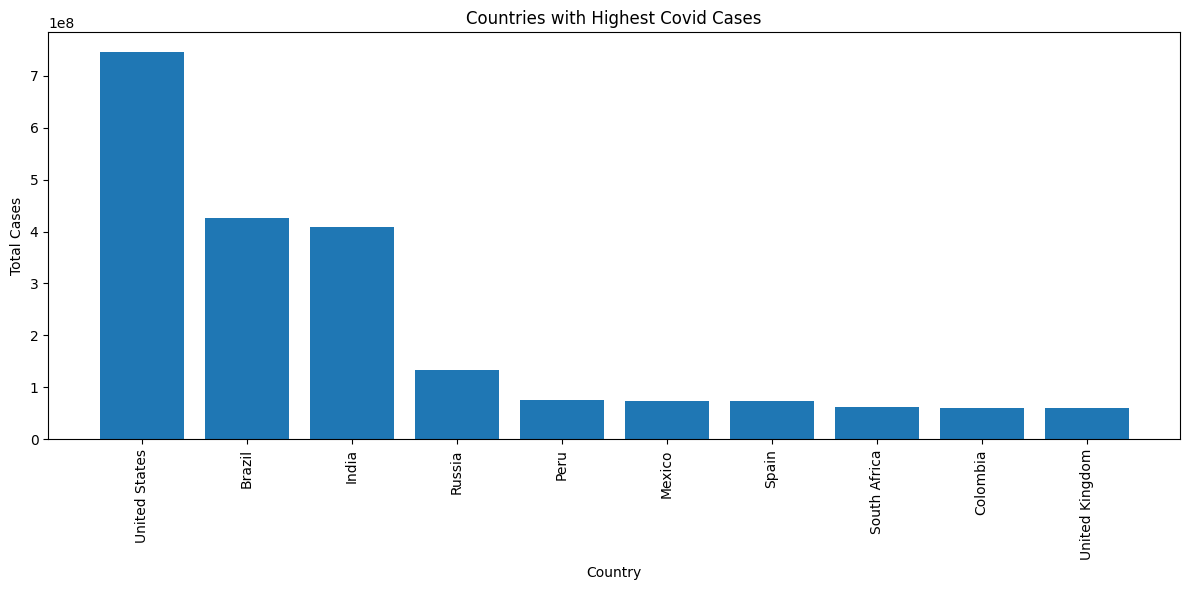

In [19]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
plt.bar(data['Country'], data['Total Cases'])
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.title('Countries with Highest Covid Cases')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()


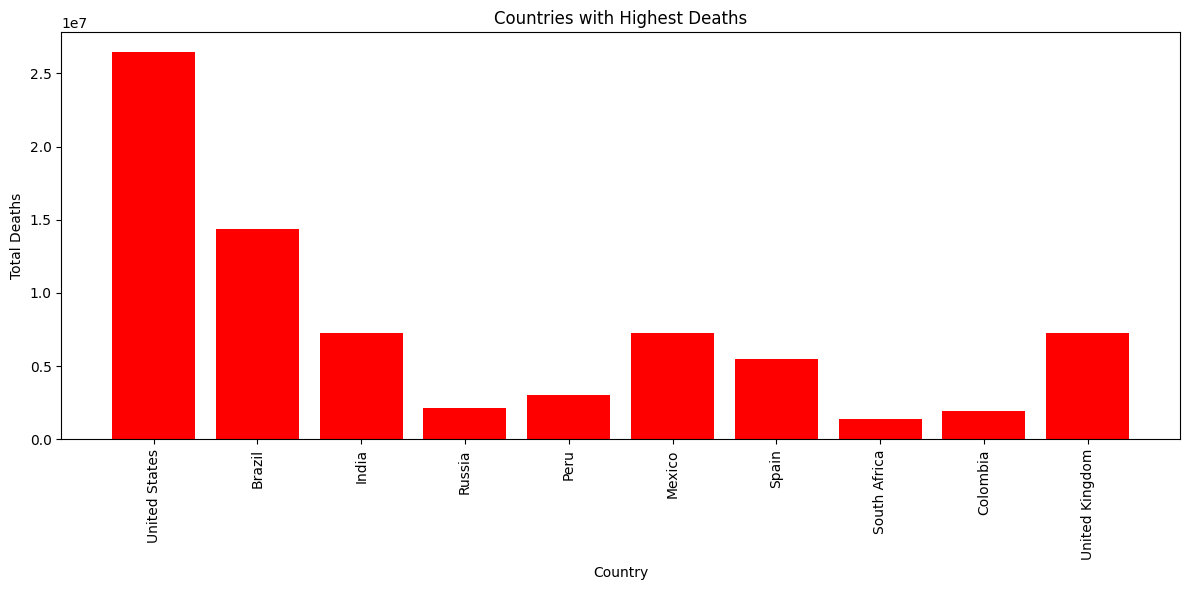

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(data['Country'], data['Total Deaths'], color='red')  
plt.xlabel('Country')
plt.ylabel('Total Deaths')
plt.title('Countries with Highest Deaths')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()


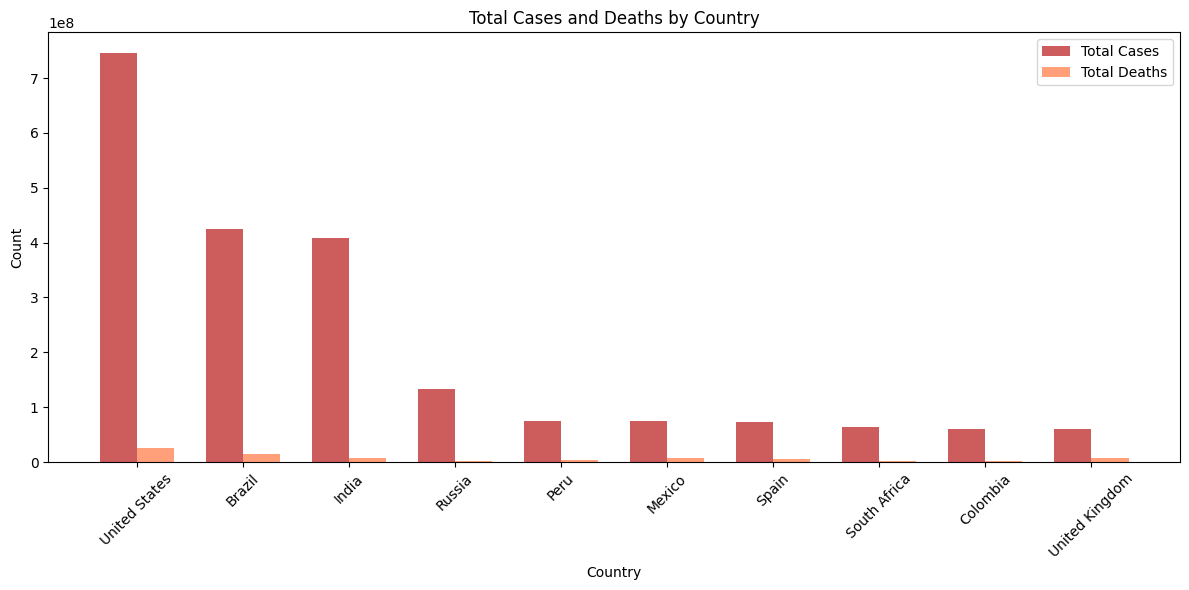

In [21]:
import matplotlib.pyplot as plt
import numpy as np

countries = data['Country']
total_cases = data['Total Cases']
total_deaths = data['Total Deaths']

fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.35
index = np.arange(len(countries))

bar1 = ax.bar(index, total_cases, bar_width, label='Total Cases', color='indianred')
bar2 = ax.bar(index + bar_width, total_deaths, bar_width, label='Total Deaths', color='lightsalmon')

ax.set_xlabel('Country')
ax.set_ylabel('Count')
ax.set_title('Total Cases and Deaths by Country')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(countries, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()


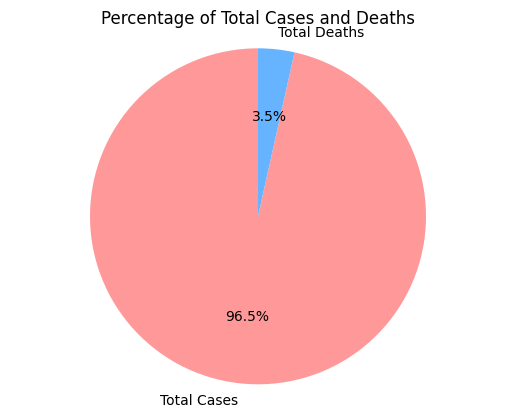

In [41]:
import matplotlib.pyplot as plt

cases = data["Total Cases"].sum()
deceased = data["Total Deaths"].sum()

labels = ["Total Cases", "Total Deaths"]
sizes = [cases, deceased]
colors = ['#ff9999','#66b3ff'] 

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  
ax.set_title('Percentage of Total Cases and Deaths')
plt.show()


In [24]:
death_rate = (data["Total Deaths"].sum() / data["Total Cases"].sum()) * 100
print("Death Rate = ", death_rate)

Death Rate =  3.6144212045653767


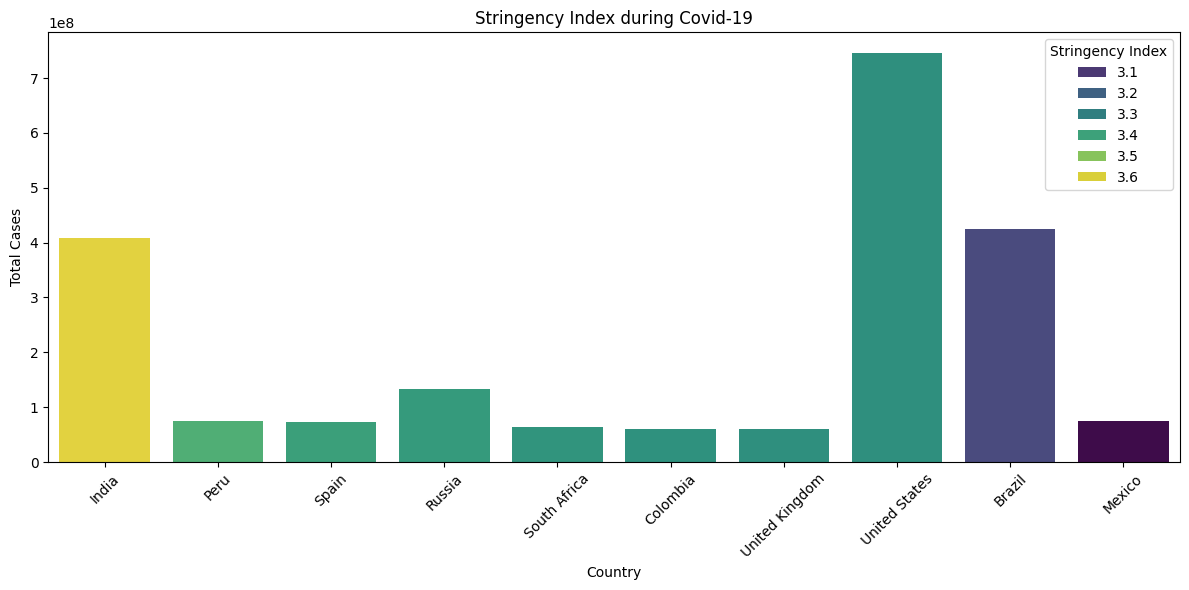

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

data_sorted = data.sort_values('Stringency Index', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Total Cases', data=data_sorted,
            palette='viridis', hue='Stringency Index', dodge=False)

plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.title('Stringency Index during Covid-19')

plt.xticks(rotation=45)
plt.legend(title='Stringency Index')
plt.tight_layout()
plt.show()


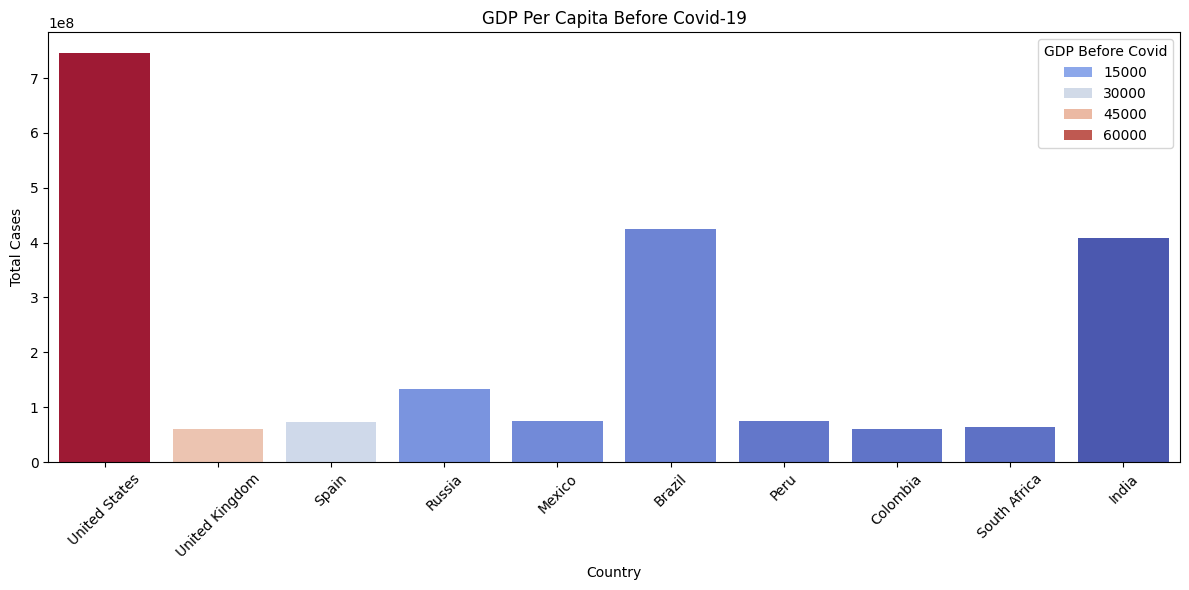

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

data_sorted = data.sort_values('GDP Before Covid', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Total Cases', data=data_sorted,
            palette='coolwarm', hue='GDP Before Covid', dodge=False)

plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.title('GDP Per Capita Before Covid-19')
plt.xticks(rotation=45)
plt.legend(title='GDP Before Covid')
plt.tight_layout()
plt.show()


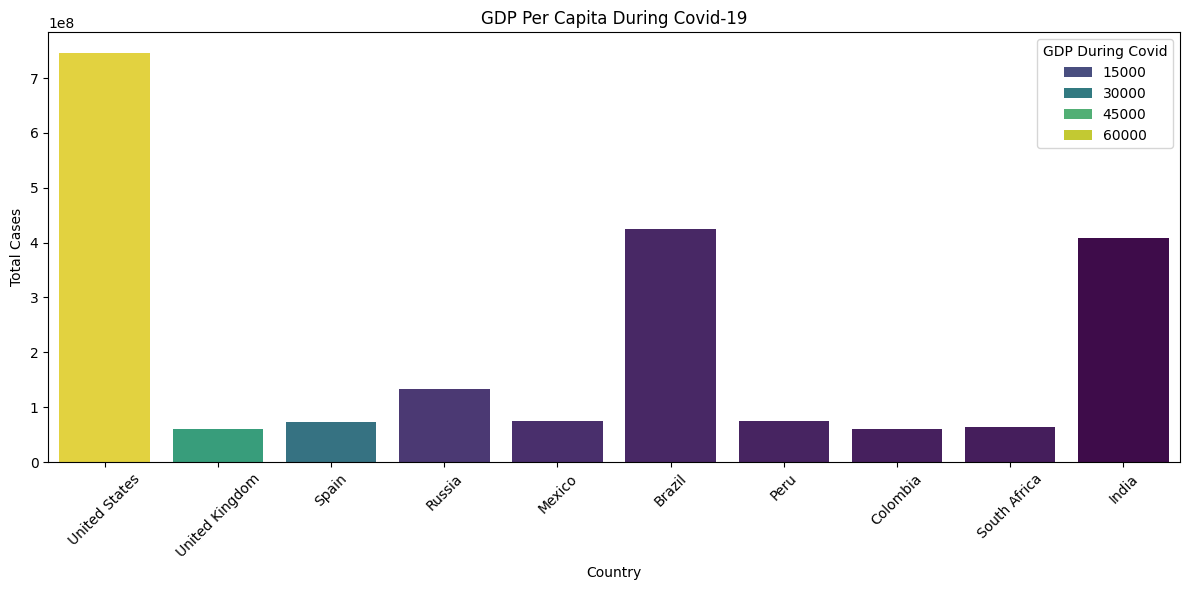

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

data_sorted = data.sort_values('GDP During Covid', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Total Cases', data=data_sorted,
            palette='viridis', hue='GDP During Covid', dodge=False)

plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.title('GDP Per Capita During Covid-19')
plt.xticks(rotation=45)
plt.legend(title='GDP During Covid')
plt.tight_layout()
plt.show()


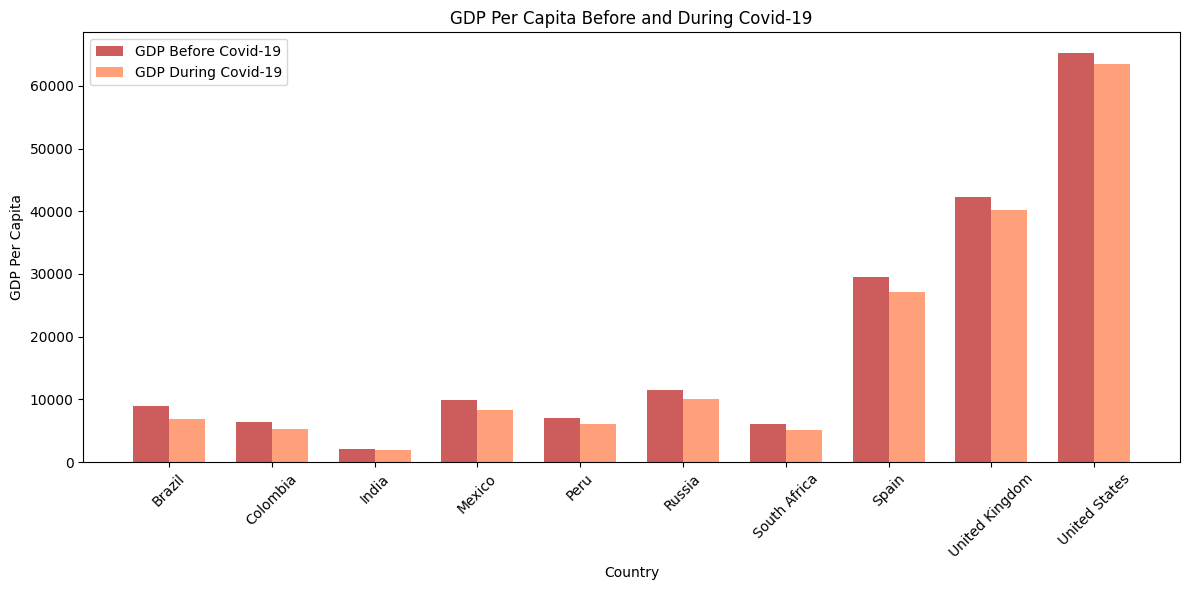

In [28]:
import matplotlib.pyplot as plt

data_sorted = data.sort_values('Country')

plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(data_sorted))

plt.bar(index, data_sorted['GDP Before Covid'], bar_width, label='GDP Before Covid-19', color='indianred')
plt.bar([i + bar_width for i in index], data_sorted['GDP During Covid'], bar_width, label='GDP During Covid-19', color='lightsalmon')

plt.xlabel('Country')
plt.ylabel('GDP Per Capita')
plt.title('GDP Per Capita Before and During Covid-19')
plt.xticks([i + bar_width / 2 for i in index], data_sorted['Country'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


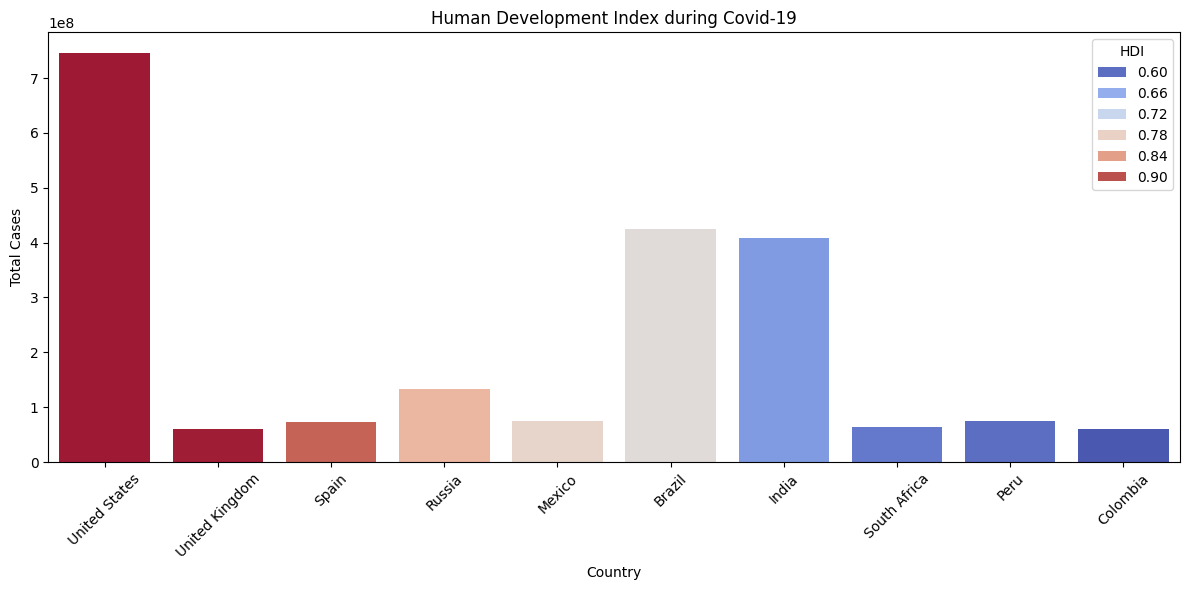

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

data_sorted = data.sort_values('HDI', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Total Cases', data=data_sorted,
            palette='coolwarm', hue='HDI', dodge=False)

plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.title('Human Development Index during Covid-19')
plt.xticks(rotation=45)
plt.legend(title='HDI')
plt.tight_layout()
plt.show()


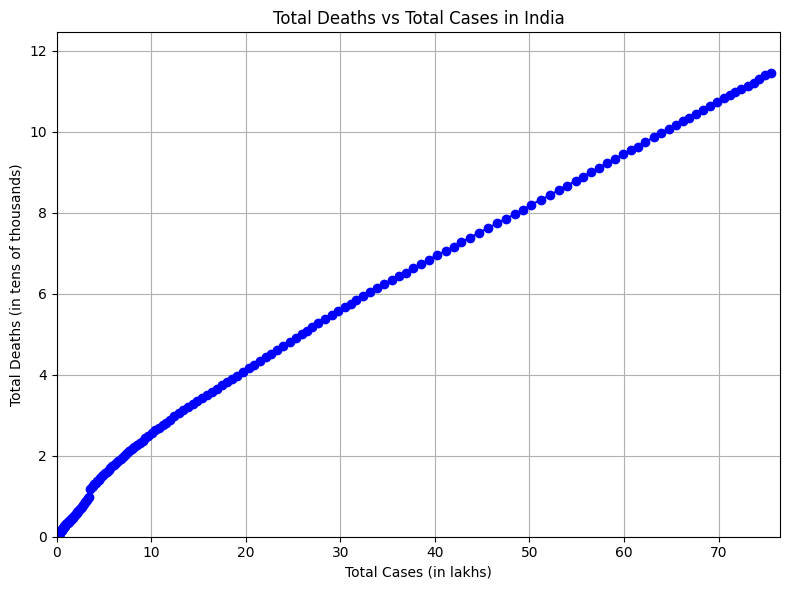

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
data2 = pd.read_csv('raw_data.csv')

india_data = data2[data2['iso_code'] == 'IND']

total_cases = india_data['total_cases'] / 100000  
total_deaths = india_data['total_deaths'] / 10000  


plt.figure(figsize=(8, 6))
plt.plot(total_cases, total_deaths, marker='o', linestyle='-', color='b')


plt.xlabel('Total Cases (in lakhs)')
plt.ylabel('Total Deaths (in tens of thousands)')
plt.title('Total Deaths vs Total Cases in India')

plt.grid(True)
plt.xlim(0, total_cases.max() + 1)  
plt.ylim(0, total_deaths.max() + 1)  

plt.tight_layout()
plt.show()
